In [150]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../Datos/' # carpeta LOCAL donde se encuentran los datasets

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_csv(DATOS_DIR + 'obesity_uci.csv')
print(f"El dataset tiene {datos.isnull().sum()} valores nulos.")


El dataset tiene Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObesity                          0
dtype: int64 valores nulos.


### Ejercicio 2: Proponga una tarea de clasificación y una tarea de regresión que puedan realizarse a partir de los datos del dataset de obesidad. 


Una tarea de clasificación puede ser la predicción de la obesidad y una de regresión el indice de masa corporal

### Ejercicio 3

a) Diagrama de Barras
Muestra la frecuencia o cantidad de casos en cada categoría de una variable cualitativa. Sirve para comparar grupos o categorías fácilmente.
👉 Ejemplo: número de personas por nivel de actividad física (sedentario, moderado, alto).

b) Histograma
Parece un diagrama de barras, pero se usa para variables numéricas continuas. Divide el rango de valores en intervalos (bins) y muestra cuántos datos caen en cada uno. Permite ver la distribución: si es simétrica, sesgada, con picos, etc.
👉 Ejemplo: distribución de edades en una población.

c) Diagrama de Caja (boxplot)
Resume una variable numérica mostrando su mediana, cuartiles y posibles valores atípicos (outliers). Es muy útil para comparar la dispersión y posición de los datos entre varios grupos.
👉 Ejemplo: comparar el índice de masa corporal (IMC) entre hombres y mujeres.

d) Diagrama de Dispersión
Representa los valores de dos variables numéricas en un plano cartesiano. Sirve para detectar relaciones, correlaciones o patrones entre variables.
👉 Ejemplo: relación entre horas de ejercicio por semana y porcentaje de grasa corporal.

Estos son las categorías  Male
Estos son los valores  [1068 1043]


<BarContainer object of 2 artists>

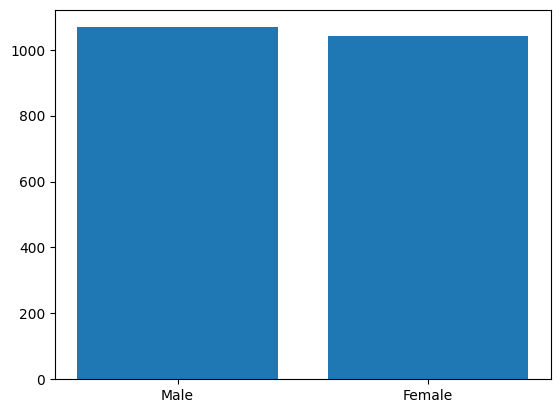

In [152]:
x = datos["Gender"].value_counts().index
print("Estos son las categorías ", x[0])
y = datos["Gender"].value_counts().values
print("Estos son los valores ", y)

plt.bar(x, y)

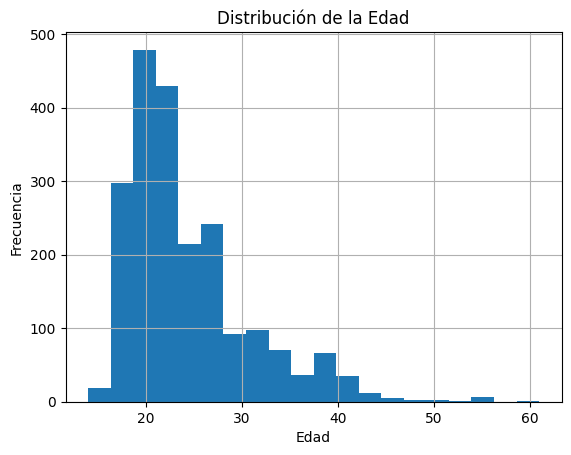

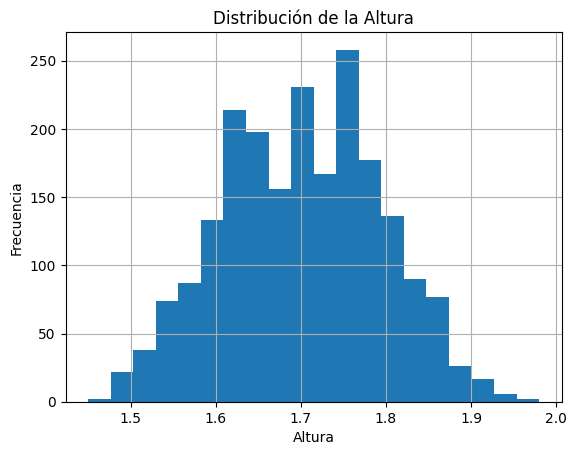

In [153]:
# El histograma nos permite ver la distribución de una variable numérica (con que frecuencia aparecen ciertos valores)

# Histograma de la variable Age
datos['Age'].hist(bins=20)  
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.show()

# Histograma de la variable Height
datos['Height'].hist(bins=20)
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Altura')
plt.show()


<Figure size 800x600 with 0 Axes>

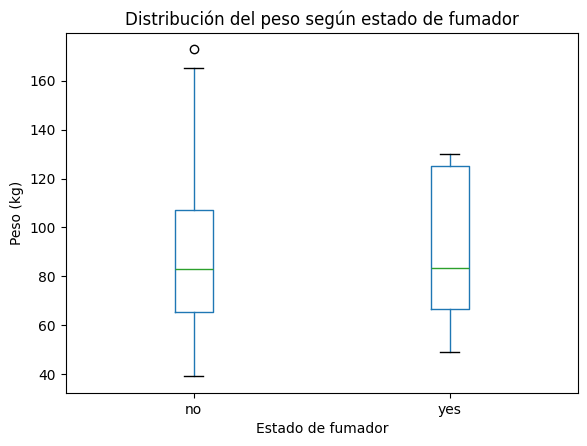

In [154]:
# Histograma de la variable Weight
plt.figure(figsize=(8,6))
datos.boxplot(column='Weight', by='SMOKE', grid=False)
plt.title('Distribución del peso según estado de fumador')
plt.suptitle('')  # borra el subtítulo automático
plt.xlabel('Estado de fumador')
plt.ylabel('Peso (kg)')
plt.show()


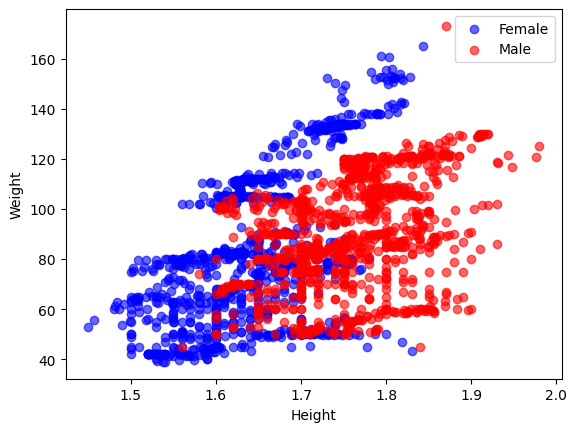

In [155]:
genders = datos["Gender"].unique()
colors = ['blue', 'red']

for gender, color in zip(genders, colors):
    mask = datos["Gender"] == gender
    plt.scatter(datos.loc[mask, "Height"], datos.loc[mask, "Weight"], label=gender, color=color, alpha=0.6)

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

### Ejercicio 5

a) Al menos el 25% de las personas con antecedentes familiares de obesidad pesan más de 100 kg.
Verdadero: El rango Interquartil (Q1-Q3) es de 75-115 kg, lo que significa que el 25% de las personas pesan más de 80 kg. Por lo que al menos el 25% de las personas con antecedentes familiares de obesidad pesan más de 100 kg.

b) Es atípico que una persona sin antecedentes familiares de obesidad (no) pese más de 115 kg.
Verdadero: El bigote superior es de 100kg, por lo que es atípico que una persona sin antecedentes familiares de obesidad (no) pese más de 115 kg.

c) La mediana del peso de las personas sin antecedentes familiares (no) es menor que 60 kg.
Verdadero: La mediana es la linea dentro del rango intercuartil y se encuentra aproximadamente en los 56kg, por lo que la mediana del peso de las personas sin antecedentes familiares (no) es menor que 60 kg.

d) Todos los valores atípicos para personas con antecedentes familiares de obesidad son leves.
Falso: Existen valores fuera del rango de los bigotes superiores y inferiores.

#### Ejercicio 6: Discretización por rango y por intervalos

In [156]:
etiq = ["Bajo","Medio","Alto"]

# Discretización por RANGO
columna = pd.cut(datos["CH2O"],bins=len(etiq),labels=etiq)

print(columna.value_counts())
print("Intervalos: ", columna.cat.categories)

columna_cut = pd.cut(datos["CH2O"], bins=3)  # sin labels
print(columna_cut.cat.categories)



CH2O
Medio    910
Alto     625
Bajo     576
Name: count, dtype: int64
Intervalos:  Index(['Bajo', 'Medio', 'Alto'], dtype='object')
IntervalIndex([(0.998, 1.667], (1.667, 2.333], (2.333, 3.0]], dtype='interval[float64, right]')


In [157]:
columna = pd.qcut(datos["CH2O"], q=3, labels=["Bajo","Medio","Alto"])
print(columna.value_counts())
print("Intervalos: ", columna.cat.categories)

columna_cut = pd.qcut(datos["CH2O"], q=3)  # sin labels
print(columna_cut.cat.categories)



CH2O
Bajo     704
Alto     704
Medio    703
Name: count, dtype: int64
Intervalos:  Index(['Bajo', 'Medio', 'Alto'], dtype='object')
IntervalIndex([(0.999, 1.92], (1.92, 2.185], (2.185, 3.0]], dtype='interval[float64, right]')


### Ejercicio 8

La correlación es:  -0.6880316726256098


<Axes: >

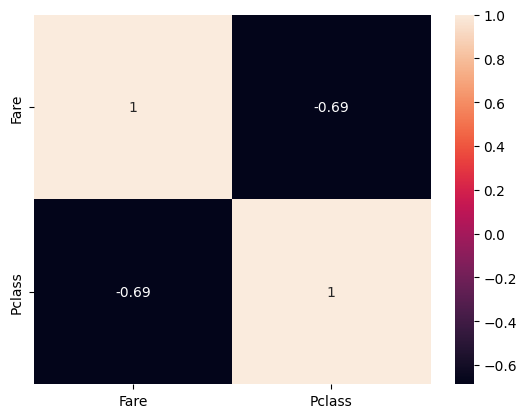

In [158]:
import seaborn as sns
datos = pd.read_csv(DATOS_DIR + 'titanic.csv')

correlacion = datos["Fare"].corr(datos["Pclass"], method='spearman')
print ("La correlación es: ", correlacion)
sns.heatmap(datos[["Fare", "Pclass"]].corr(method='spearman'), annot=True)

Existe una correlación lineal débil puesto que 0.5 < abs(-0.688) < 0.8. Esto quiere decir que a medida que el número de clase aumenta (de 1 a 3) el precio de la tarifa disminiuye.
Aclaración: Se usó el método spearman porque la variable de clase es ordinal, y el método .corr() usa Pearson por defecto (para variables continuas) en vez de Spearman(para variables discretas)

#### Ejercicio 9

In [159]:
datos = pd.read_csv(DATOS_DIR + 'autos.csv')

# Valores que no pueden ser procesados como 
columas_no_numericas = datos.columns[datos.dtypes == 'object']
print("Columnas que no son numéricos: ", columas_no_numericas)
print("====================================================================")

datos[columas_no_numericas]

Columnas que no son numéricos:  Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,16845
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300,19045
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500,21485
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.4,106,4800,22470


#### Vamos columna por columna: 

make: Este es el caso más particular. Hay muchos valores únicos en la columna, por lo que el preprocesamiento dependerá de en qué se base el procesamiento. Por ejemplo:
-  Si se desea hacer un modelo de regresión lineal, se puede reemplazar cada marca por el promedio del precio.
-  Si se va a utilizar una red neuronal, se puede realizar un embedding previo a la red.
-  Si no es de mucha importancia, se puede directamente quitar la columna para el procesamiento.

fuel-type: Este es un caso sencillo, ya que solo hay dos valores posibles (gasolina y diesel). Se puede utilizar One-Hot Encoding para convertir esta columna en dos columnas binarias (una para cada tipo de combustible).

In [160]:
datos["fuel-type"] = datos["fuel-type"].map({'gas':0, 'diesel':1})
print(datos["fuel-type"].head())

0    0
1    0
2    0
3    0
4    0
Name: fuel-type, dtype: int64


num-of-doors: Reemplazamos los números en formato string por el formato numérico

In [161]:
datos["num-of-doors"] = datos["num-of-doors"].map({'two': 2, 'four': 4}).astype('Int64')
print(datos["num-of-doors"].head())

0    2
1    2
2    2
3    4
4    4
Name: num-of-doors, dtype: Int64


body-style: Son 5 valores únicos, es un número manejable para el formato de one-code

In [162]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
body_style_encoded = encoder.fit_transform(datos[["body-style"]])
body_style_df = pd.DataFrame(body_style_encoded, columns=encoder.get_feature_names_out(["body-style"])).astype("Int64")


datos = datos.join(body_style_df)
datos.drop(columns=["body-style"], inplace=True)

datos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,?,alfa-romero,0,std,2,rwd,front,88.6,168.8,...,111,5000,21,27,13495,1,0,0,0,0
1,3,?,alfa-romero,0,std,2,rwd,front,88.6,168.8,...,111,5000,21,27,16500,1,0,0,0,0
2,1,?,alfa-romero,0,std,2,rwd,front,94.5,171.2,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164,audi,0,std,4,fwd,front,99.8,176.6,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164,audi,0,std,4,4wd,front,99.4,176.6,...,115,5500,18,22,17450,0,0,0,1,0


In [163]:
print(datos['engine-type'].describe())

# Categorías en 'engine-type'
print(datos['engine-type'].value_counts())
print(datos['engine-type'].value_counts().index)

# No sé bien como representar las categorías de 'engine-type'

# Una opción es usar one-hot encoding
encoded = pd.get_dummies(datos['engine-type'], prefix='engine', dtype=int)
print(encoded)

# Otra opción es asignar un número a cada categoría (ordinal encoding) pero le estaríamos dando un orden que no tiene
categorias = datos['engine-type'].value_counts().index
print(categorias)

count     205
unique      7
top       ohc
freq      148
Name: engine-type, dtype: object
engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
Index(['ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', 'dohcv'], dtype='object', name='engine-type')
     engine_dohc  engine_dohcv  engine_l  engine_ohc  engine_ohcf  \
0              1             0         0           0            0   
1              1             0         0           0            0   
2              0             0         0           0            0   
3              0             0         0           1            0   
4              0             0         0           1            0   
..           ...           ...       ...         ...          ...   
200            0             0         0           1            0   
201            0             0         0           1            0   
202            0             0         0           0           

### Ejercicio 10

In [164]:
# Mostrar par de gráficos juntos
def show(left, right , title_left, title_right):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.boxplot(left, tick_labels=["Altura", "Peso"])
    plt.title(title_left)

    plt.subplot(1, 2, 2)
    plt.boxplot(right, tick_labels=["Altura", "Peso"])
    plt.title(title_right)

    plt.tight_layout()
    plt.show()

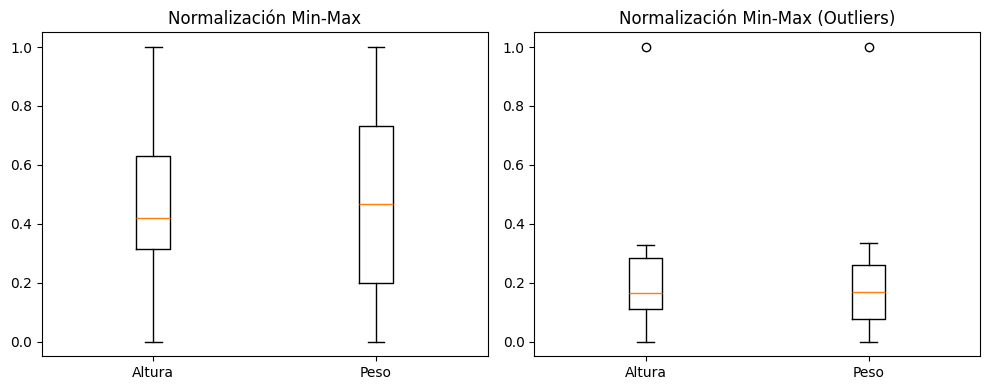

En este caso podemos ver que la normalización Min-Max es muy sensible a los outliers, ya que al añadir un outlier, los valores normales tienden a 'apretarse' cerca del 0.


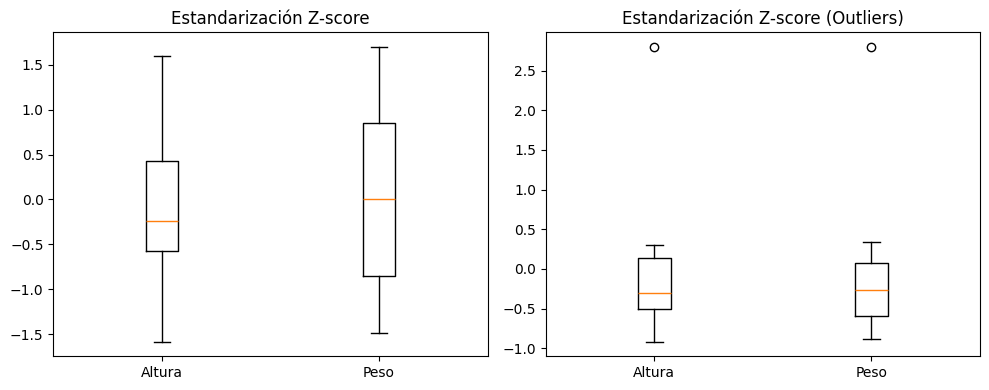

Como usa la media y la desviación estándar, el outlier aumenta mucho la desviación. Se observa que la caja de los datos normales queda más comprimida en torno a 0, y el outlier aparece como un valor muy alejado (en torno a +2.5).


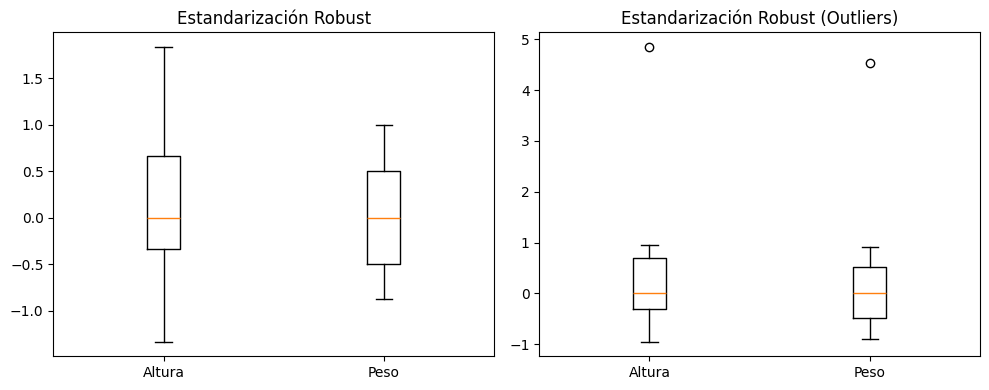

Como se basa en mediana e IQR, el outlier apenas afecta la escala.
Se observa que la caja de los datos normales se mantiene prácticamente igual que en el caso sin outliers, y los valores extremos aparecen como puntos lejanos.


In [165]:
# Crear el dataset con los datos de la imagen
datos = {
    'Altura': [1.65, 1.81, 1.70, 1.62, 1.74, 1.70, 1.80, 1.73, 1.68,],
    'Peso':   [75,   86,   82,   78,   77,   87,   90,   83,   80,]
}
df_ap = pd.DataFrame(datos)

datos_outliers = {
    "Altura": datos["Altura"].copy(),
    "Peso": datos["Peso"].copy()
}
datos_outliers["Altura"].append(2.20)
datos_outliers["Peso"].append(120)
df_outliers = pd.DataFrame(datos_outliers)


import sklearn.preprocessing as pr

# Normalización Min-Max
min_max_scaler = pr.MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df_ap)

df_minmax_outliers = min_max_scaler.fit_transform(df_outliers)
show(df_minmax, df_minmax_outliers, 'Normalización Min-Max', 'Normalización Min-Max (Outliers)')

print("En este caso podemos ver que la normalización Min-Max es muy sensible a los outliers, ya que al añadir un outlier, los valores normales tienden a 'apretarse' cerca del 0.")

print("=====================================================================================================")

# Normalización Z-score
std = pr.StandardScaler()
df_std = std.fit_transform(df_ap)
df_std_outliers = std.fit_transform(df_outliers)
show(df_std, df_std_outliers, 'Estandarización Z-score', 'Estandarización Z-score (Outliers)')

print("Como usa la media y la desviación estándar, el outlier aumenta mucho la desviación. " \
"Se observa que la caja de los datos normales queda más comprimida en torno a 0, y el outlier aparece como un valor muy alejado (en torno a +2.5).")

print("=====================================================================================================")

# Normalización Robust
robust = pr.RobustScaler()
df_robust = robust.fit_transform(df_ap)
df_robust_outliers = robust.fit_transform(df_outliers)
show(df_robust, df_robust_outliers, 'Estandarización Robust', 'Estandarización Robust (Outliers)')

print("Como se basa en mediana e IQR, el outlier apenas afecta la escala.\n"
      "Se observa que la caja de los datos normales se mantiene prácticamente igual que en el caso sin outliers, y los valores extremos aparecen como puntos lejanos.")
